In [6]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from tqdm import tqdm

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms


# 코드 다시 돌리기 위한 seed 고정
import random
import numpy as np
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [12]:
class MyModel(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(MyModel, self).__init__()
        """Base Model"""
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x        

In [13]:
model = MyModel(3, 100).to(device)
model

MyModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=100, bias=True)
)

In [14]:
train_transform = transforms.Compose([    
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])        

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])    

train = torchvision.datasets.CIFAR100(root="./", train=True, download=True, transform=train_transform)
test = torchvision.datasets.CIFAR100(root="./", train=False, download=True, transform=test_transform)

train_loader = torch.utils.data.DataLoader(train, batch_size=256,
                                           shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test, batch_size=256,
                                          shuffle=False, num_workers=2)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Files already downloaded and verified
Files already downloaded and verified


In [7]:
for epoch in range(100):
    model.train()
    running_loss = 0.0
    best_acc = 0.0
    best_model_wts = model.state_dict()
    print(f"train epoch: {epoch+1}----------------")
    for img, label in tqdm(train_loader):
        img = img.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, label)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    correct, all_data = 0,0
    print("\ntrain_loss : ", running_loss / len(train_loader))
    model.eval()
    for img, label in test_loader:
        with torch.no_grad():
            img = img.to(device)
            label = label.to(device)
            output = model(img)

            correct += torch.sum(torch.argmax(output, dim=1) == label).item()
            all_data += len(label)
    print("val_acc : ", correct / all_data)
    if correct / all_data > best_acc:
        best_acc = correct / all_data
        best_model_wts = model.state_dict()

train epoch: 1----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:27<00:00,  7.20it/s]



train_loss :  4.326148988032828
val_acc :  0.084
train epoch: 2----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:29<00:00,  6.69it/s]



train_loss :  3.739006889109709
val_acc :  0.1432
train epoch: 3----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:31<00:00,  6.18it/s]



train_loss :  3.48966199889475
val_acc :  0.1628
train epoch: 4----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:24<00:00, 19.16it/s]



train_loss :  3.3321375591414317
val_acc :  0.2004
train epoch: 5----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:27<00:00,  7.16it/s]



train_loss :  3.2313014621637306
val_acc :  0.1908
train epoch: 6----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.22it/s]



train_loss :  3.153421000558503
val_acc :  0.2121
train epoch: 7----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  8.96it/s]



train_loss :  3.0905934414085077
val_acc :  0.2197
train epoch: 8----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.28it/s]



train_loss :  3.0586318410172755
val_acc :  0.214
train epoch: 9----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.67it/s]



train_loss :  3.0122096112796237
val_acc :  0.2213
train epoch: 10----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:24<00:00,  8.14it/s]



train_loss :  2.9721233297367484
val_acc :  0.219
train epoch: 11----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00, 20.18it/s]



train_loss :  2.951647808357161
val_acc :  0.2192
train epoch: 12----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:29<00:00,  6.58it/s]



train_loss :  2.9530422614545238
val_acc :  0.2148
train epoch: 13----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:24<00:00,  7.91it/s]



train_loss :  2.9114941468044204
val_acc :  0.2118
train epoch: 14----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00,  8.50it/s]



train_loss :  2.897137307390875
val_acc :  0.2216
train epoch: 15----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00,  8.21it/s]



train_loss :  2.86036669964693
val_acc :  0.2292
train epoch: 16----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00,  8.24it/s]



train_loss :  2.8868769078838583
val_acc :  0.2164
train epoch: 17----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:24<00:00,  7.95it/s]



train_loss :  2.838147823907891
val_acc :  0.2187
train epoch: 18----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.36it/s]



train_loss :  2.8409756640998687
val_acc :  0.2094
train epoch: 19----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.58it/s]



train_loss :  2.8281107313778935
val_acc :  0.2258
train epoch: 20----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00, 20.43it/s]



train_loss :  2.821145996755483
val_acc :  0.197
train epoch: 21----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.73it/s]



train_loss :  2.853960610165888
val_acc :  0.2101
train epoch: 22----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:24<00:00,  8.06it/s]



train_loss :  2.8310495590677065
val_acc :  0.213
train epoch: 23----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:25<00:00,  7.70it/s]



train_loss :  2.8261695954264425
val_acc :  0.1725
train epoch: 24----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.20it/s]



train_loss :  2.8191010368113614
val_acc :  0.2161
train epoch: 25----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.46it/s]



train_loss :  2.8291771083461996
val_acc :  0.2009
train epoch: 26----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.22it/s]



train_loss :  2.8091006911530787
val_acc :  0.2112
train epoch: 27----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.60it/s]



train_loss :  2.8036305965209496
val_acc :  0.1985
train epoch: 28----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.04it/s]



train_loss :  2.7633717826434543
val_acc :  0.2096
train epoch: 29----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.38it/s]



train_loss :  2.7886832563244566
val_acc :  0.2111
train epoch: 30----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.90it/s]



train_loss :  2.7888345256143685
val_acc :  0.2012
train epoch: 31----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.29it/s]



train_loss :  2.771023199266317
val_acc :  0.2186
train epoch: 32----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00, 20.59it/s]



train_loss :  2.798570077030026
val_acc :  0.1907
train epoch: 33----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.36it/s]



train_loss :  2.7884541190400416
val_acc :  0.2101
train epoch: 34----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.79it/s]



train_loss :  2.7665470777725685
val_acc :  0.2049
train epoch: 35----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.49it/s]



train_loss :  2.796346812832112
val_acc :  0.1984
train epoch: 36----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.90it/s]



train_loss :  2.7587487344839134
val_acc :  0.2117
train epoch: 37----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.40it/s]



train_loss :  2.790960967540741
val_acc :  0.2047
train epoch: 38----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  8.95it/s]



train_loss :  2.786841336561709
val_acc :  0.2109
train epoch: 39----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.44it/s]



train_loss :  2.741527267864772
val_acc :  0.2142
train epoch: 40----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.60it/s]



train_loss :  2.7846816303778668
val_acc :  0.2102
train epoch: 41----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.66it/s]



train_loss :  2.794226215810192
val_acc :  0.2013
train epoch: 42----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.64it/s]



train_loss :  2.779939516466491
val_acc :  0.2012
train epoch: 43----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.52it/s]



train_loss :  2.80368394876013
val_acc :  0.2053
train epoch: 44----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.73it/s]



train_loss :  2.7632174041806437
val_acc :  0.1901
train epoch: 45----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.45it/s]



train_loss :  2.815016969126098
val_acc :  0.1984
train epoch: 46----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.63it/s]



train_loss :  2.773391434124538
val_acc :  0.1999
train epoch: 47----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.15it/s]



train_loss :  2.7817350893604513
val_acc :  0.1971
train epoch: 48----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.47it/s]



train_loss :  2.797480050398379
val_acc :  0.2093
train epoch: 49----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  8.99it/s]



train_loss :  2.758785677199461
val_acc :  0.1972
train epoch: 50----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.48it/s]



train_loss :  2.7385090516538035
val_acc :  0.201
train epoch: 51----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  8.95it/s]



train_loss :  2.7792737690769895
val_acc :  0.1899
train epoch: 52----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.39it/s]



train_loss :  2.7256961221597633
val_acc :  0.1972
train epoch: 53----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.83it/s]



train_loss :  2.7833106383985404
val_acc :  0.2009
train epoch: 54----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:26<00:00,  7.46it/s]



train_loss :  2.792803277774733
val_acc :  0.2027
train epoch: 55----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:27<00:00,  7.20it/s]



train_loss :  2.7420234193607254
val_acc :  0.2005
train epoch: 56----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:25<00:00, 18.03it/s]



train_loss :  2.774326840225531
val_acc :  0.209
train epoch: 57----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.65it/s]



train_loss :  2.772159940125991
val_acc :  0.2
train epoch: 58----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:25<00:00, 19.68it/s]



train_loss :  2.7719644746001886
val_acc :  0.2015
train epoch: 59----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00,  8.20it/s]



train_loss :  2.7376215859335296
val_acc :  0.1988
train epoch: 60----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.79it/s]



train_loss :  2.756621323069748
val_acc :  0.2086
train epoch: 61----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  8.92it/s]



train_loss :  2.782188348624171
val_acc :  0.2037
train epoch: 62----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.86it/s]



train_loss :  2.758494866137602
val_acc :  0.2057
train epoch: 63----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00, 18.43it/s]



train_loss :  2.7813301183739485
val_acc :  0.1931
train epoch: 64----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00, 19.27it/s]



train_loss :  2.766013492126854
val_acc :  0.2039
train epoch: 65----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.69it/s]



train_loss :  2.7714547514915466
val_acc :  0.1847
train epoch: 66----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00,  8.44it/s]



train_loss :  2.7649189647363155
val_acc :  0.1881
train epoch: 67----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00,  8.46it/s]



train_loss :  2.762658318694757
val_acc :  0.1989
train epoch: 68----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00, 15.93it/s]



train_loss :  2.7368257070074278
val_acc :  0.1929
train epoch: 69----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  8.93it/s]



train_loss :  2.7388302221590157
val_acc :  0.199
train epoch: 70----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:24<00:00,  7.93it/s]



train_loss :  2.770959824931865
val_acc :  0.1938
train epoch: 71----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:24<00:00,  8.05it/s]



train_loss :  2.7609776818022436
val_acc :  0.1905
train epoch: 72----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00, 21.12it/s]



train_loss :  2.7644258165846067
val_acc :  0.2145
train epoch: 73----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.57it/s]



train_loss :  2.7834085615313784
val_acc :  0.1988
train epoch: 74----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.33it/s]



train_loss :  2.7620906671699212
val_acc :  0.201
train epoch: 75----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00,  9.76it/s]



train_loss :  2.7745216537495048
val_acc :  0.205
train epoch: 76----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  8.95it/s]



train_loss :  2.7593544125556946
val_acc :  0.1991
train epoch: 77----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:31<00:00,  6.31it/s]



train_loss :  2.713647888631237
val_acc :  0.2015
train epoch: 78----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:27<00:00,  7.22it/s]



train_loss :  2.740964971026596
val_acc :  0.2041
train epoch: 79----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:24<00:00,  7.92it/s]



train_loss :  2.7187053877480176
val_acc :  0.1993
train epoch: 80----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.62it/s]



train_loss :  2.7864042775971547
val_acc :  0.1965
train epoch: 81----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  8.95it/s]



train_loss :  2.774855844828547
val_acc :  0.1915
train epoch: 82----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.01it/s]



train_loss :  2.749820195898718
val_acc :  0.2044
train epoch: 83----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:27<00:00,  7.11it/s]



train_loss :  2.792651506102815
val_acc :  0.1996
train epoch: 84----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00,  8.39it/s]



train_loss :  2.7783394772179273
val_acc :  0.189
train epoch: 85----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.20it/s]



train_loss :  2.8233504003408005
val_acc :  0.1862
train epoch: 86----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00, 18.32it/s]



train_loss :  2.767855201448713
val_acc :  0.2039
train epoch: 87----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00, 19.60it/s]



train_loss :  2.7898525315888074
val_acc :  0.1778
train epoch: 88----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:25<00:00, 17.89it/s]



train_loss :  2.769830119853117
val_acc :  0.1896
train epoch: 89----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.60it/s]



train_loss :  2.758046504186124
val_acc :  0.1961
train epoch: 90----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00, 18.89it/s]



train_loss :  2.7638313429696217
val_acc :  0.1843
train epoch: 91----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  8.96it/s]



train_loss :  2.789913533901682
val_acc :  0.194
train epoch: 92----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:19<00:00, 20.89it/s]



train_loss :  2.7632577455773646
val_acc :  0.2104
train epoch: 93----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:21<00:00,  9.06it/s]



train_loss :  2.76363748798565
val_acc :  0.1917
train epoch: 94----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00, 19.94it/s]



train_loss :  2.775274803443831
val_acc :  0.2009
train epoch: 95----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00,  8.28it/s]



train_loss :  2.8216212464838613
val_acc :  0.1949
train epoch: 96----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00,  8.24it/s]



train_loss :  2.7603034231127523
val_acc :  0.1903
train epoch: 97----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:25<00:00,  7.58it/s]



train_loss :  2.7471975343567983
val_acc :  0.1954
train epoch: 98----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.90it/s]



train_loss :  2.8023152375707823
val_acc :  0.1863
train epoch: 99----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:20<00:00, 20.92it/s]



train_loss :  2.8102759621581255
val_acc :  0.1975
train epoch: 100----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:22<00:00,  8.80it/s]



train_loss :  2.818308235431204
val_acc :  0.1982


Base model의 구조는 다음과 같다.
CONV_1(ReLU) - POOL_1 - CONV_2(ReLU) - (Flatten)FC_1 - FC_2(ReLU) - FC_3

Base model의 성능이 0.1982로 매우 낮은 것을 알 수 있는데, 이는 클래스를 분류하기 위해 층이 충분히 쌓이지 않아서라고 생각했다. <br>
따라서 먼저 층을 추가하고 각 층에 unit의 수도 늘리는 방법을 생각했다.<br>

따라서 VGG network를 이용하여 학습해보았다.

# VGG

In [6]:
def conv_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        init.xavier_uniform(m.weight, gain=np.sqrt(2))
        init.constant(m.bias, 0)

In [7]:
def cfg(depth):
    depth_lst = [11, 13, 16, 19]
    assert (depth in depth_lst), "Error : VGGnet depth should be either 11, 13, 16, 19"
    cf_dict = {
        '11': [
            64, 'mp',
            128, 'mp',
            256, 256, 'mp',
            512, 512, 'mp',
            512, 512, 'mp'],
        '13': [
            64, 64, 'mp',
            128, 128, 'mp',
            256, 256, 'mp',
            512, 512, 'mp',
            512, 512, 'mp'
            ],
        '16': [
            64, 64, 'mp',
            128, 128, 'mp',
            256, 256, 256, 'mp',
            512, 512, 512, 'mp',
            512, 512, 512, 'mp'
            ],
        '19': [
            64, 64, 'mp',
            128, 128, 'mp',
            256, 256, 256, 256, 'mp',
            512, 512, 512, 512, 'mp',
            512, 512, 512, 512, 'mp'
            ],
    }

    return cf_dict[str(depth)]

In [8]:
def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=True)


In [9]:
class VGG(nn.Module):
    def __init__(self, depth, num_classes):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg(depth))
        self.linear = nn.Linear(512, num_classes)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.linear(out)

        return out

    def _make_layers(self, cfg):
        layers = []
        in_planes = 3

        for x in cfg:
            if x == 'mp':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [conv3x3(in_planes, x), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_planes = x

        # After cfg convolution
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)


In [10]:
model_vgg = VGG(16, 100).to(device)
model_vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [15]:
train_transform = transforms.Compose([    
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])        

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])    

train = torchvision.datasets.CIFAR100(root="./", train=True, download=True, transform=train_transform)
test = torchvision.datasets.CIFAR100(root="./", train=False, download=True, transform=test_transform)

train_loader = torch.utils.data.DataLoader(train, batch_size=256,
                                           shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test, batch_size=256,
                                          shuffle=False, num_workers=2)

optimizer = optim.SGD(model_vgg.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Files already downloaded and verified
Files already downloaded and verified


In [16]:
for epoch in range(10):
    model_vgg.train()
    running_loss = 0.0
    best_acc = 0.0
    best_model_wts = model_vgg.state_dict()
    print(f"train epoch: {epoch+1}----------------")
    for img, label in tqdm(train_loader):
        img = img.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model_vgg(img)
        loss = criterion(output, label)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    correct, all_data = 0,0
    print("\ntrain_loss : ", running_loss / len(train_loader))
    model_vgg.eval()
    for img, label in test_loader:
        with torch.no_grad():
            img = img.to(device)
            label = label.to(device)
            output = model_vgg(img)

            correct += torch.sum(torch.argmax(output, dim=1) == label).item()
            all_data += len(label)
    print("val_acc : ", correct / all_data)
    if correct / all_data > best_acc:
        best_acc = correct / all_data
        best_model_wts = model_vgg.state_dict()

train epoch: 1----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [22:34<00:00,  5.65s/it]



train_loss :  4.865232195172991
val_acc :  0.0269
train epoch: 2----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [23:15<00:00,  5.58s/it]



train_loss :  4.283809530491731
val_acc :  0.054
train epoch: 3----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [23:08<00:00,  5.50s/it]



train_loss :  4.039088159191365
val_acc :  0.0667
train epoch: 4----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [24:19<00:00,  6.34s/it]



train_loss :  3.892725381315971
val_acc :  0.0916
train epoch: 5----------------


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [25:16<00:00,  6.80s/it]



train_loss :  3.7628748270930075
val_acc :  0.107
train epoch: 6----------------


  2%|█▋                                                                                | 4/196 [00:44<38:31, 12.04s/it]

KeyboardInterrupt: 

In [18]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [19]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))
        
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True) 
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) 
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True) 
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) 
        self.conv5 = conv_block(512, 1028, pool=True) 
        self.res3 = nn.Sequential(conv_block(1028, 1028), conv_block(1028, 1028))  
        
        self.classifier = nn.Sequential(nn.MaxPool2d(2), # 1028 x 1 x 1
                                        nn.Flatten(), # 1028 
                                        nn.Linear(1028, num_classes)) # 1028 -> 100
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.res3(out) + out
        out = self.classifier(out)
        return out

model = to_device(ResNet9(3, 100), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
for epoch in range(10):
    model.train()
    running_loss = 0.0
    best_acc = 0.0
    best_model_wts = model.state_dict()
    print(f"train epoch: {epoch+1}----------------")
    for img, label in tqdm(train_loader):
        img = img.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, label)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    correct, all_data = 0,0
    print("\ntrain_loss : ", running_loss / len(train_loader))
    model.eval()
    for img, label in test_loader:
        with torch.no_grad():
            img = img.to(device)
            label = label.to(device)
            output = model(img)

            correct += torch.sum(torch.argmax(output, dim=1) == label).item()
            all_data += len(label)
    print("val_acc : ", correct / all_data)
    if correct / all_data > best_acc:
        best_acc = correct / all_data
        best_model_wts = model.state_dict()

train epoch: 1----------------



  5%|████▏                                                                            | 10/196 [02:31<50:43, 16.36s/it]

# Inception

VGG network는 훈련시킬 변수의 개수가 많아 네트워크의 크기가 커진다는 단점이 있다. 이를 보완하기 위해 Inception 개념이 나오게 되었다.
Inception은 NIN의 구조에 기반하는데, **NIN**은 네트워크 속 네트워크(Network In Network)를 의미한다. 일반적으로 CNN은 Conv layer + Pooling layer와 fully connected layer로 구성되는데 NIN의 설계자는 Conv의 레이어가 local receptive filed에서 feature를 추출해내는데는 우수하지만 filter의 특징이 linear하므로 non-linear한 feature를 추출해내기 위해서는 feature의 개수를 늘려야한다는 문제점이 있다. 따라서 local receptive field 안에서 feature를 좀 더 잘 추출할 수 있도록 micro neural network를 설계하여 convolution 단계에서 filter 대신 MLP를 사용하여 non-linear한 feature를 추출할 수 있도록 하였다. 
1x1 Convolution도 사용하였는데 이는 차원을 줄이기 위함으로 여러 개의 feature map으로부터 비슷한 성질을 갖는 것들을 묶어낼 수 있고, 결과적으로 feature map의 개수를 줄임으로써 연산량을 줄이고 층을 깊게 쌓을 수 있다. <br>
<br>
**Inception**
Inception 구조는 3x3, 5x5 Convolution 앞에 1x1 Convolution을 cascade 구조를 두고, 1x1 Convolution을 통해 feature map의 개수를 줄이는 것으로 깊은 망을 구성할 수 있었다 .
구현할 Inception-ResNet-v2구조는 아래와 같다.

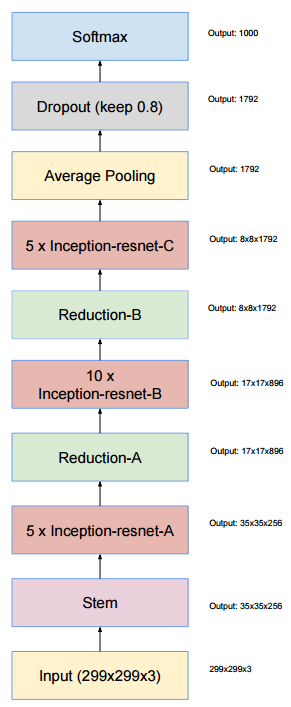

In [9]:
class BasicConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, **kwargs):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, bias=False, **kwargs),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.conv(x)
        return x

In [10]:
class Stem(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Sequential(
            BasicConv2d(3, 32, 3, stride=2, padding=0), # 149 x 149 x 32
            BasicConv2d(32, 32, 3, stride=1, padding=0), # 147 x 147 x 32
            BasicConv2d(32, 64, 3, stride=1, padding=1), # 147 x 147 x 64 
        )

        self.branch3x3_conv = BasicConv2d(64, 96, 3, stride=2, padding=0) # 73x73x96

        #  kernel_size=4: 피쳐맵 크기 73, kernel_size=3: 피쳐맵 크기 74
        self.branch3x3_pool = nn.MaxPool2d(4, stride=2, padding=1) # 73x73x64

        self.branch7x7a = nn.Sequential(
            BasicConv2d(160, 64, 1, stride=1, padding=0),
            BasicConv2d(64, 96, 3, stride=1, padding=0)
        ) # 71x71x96

        self.branch7x7b = nn.Sequential(
            BasicConv2d(160, 64, 1, stride=1, padding=0),
            BasicConv2d(64, 64, (7,1), stride=1, padding=(3,0)),
            BasicConv2d(64, 64, (1,7), stride=1, padding=(0,3)),
            BasicConv2d(64, 96, 3, stride=1, padding=0)
        ) # 71x71x96

        self.branchpoola = BasicConv2d(192, 192, 3, stride=2, padding=0) # 35x35x192

        #  kernel_size=4: 피쳐맵 크기 73, kernel_size=3: 피쳐맵 크기 74
        self.branchpoolb = nn.MaxPool2d(4, 2, 1) # 35x35x192


    def forward(self, x):
        x = self.conv1(x)
        x = torch.cat((self.branch3x3_conv(x), self.branch3x3_pool(x)), dim=1)
        x = torch.cat((self.branch7x7a(x), self.branch7x7b(x)), dim=1)
        x = torch.cat((self.branchpoola(x), self.branchpoolb(x)), dim=1)
        return x

Stem을 잘 구축했는지 확인했다. 중간중간 채널 수와 feature map의 크기가 맞는지 확인했다.

In [11]:
# check Stem
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = torch.randn((3, 3, 299, 299)).to(device)
model = Stem().to(device)
output_Stem = model(x)
print('Input size:', x.size())
print('Stem output size:', output_Stem.size())

Input size: torch.Size([3, 3, 299, 299])
Stem output size: torch.Size([3, 384, 35, 35])


Inception-ResNet-A 모듈을 정의했다.
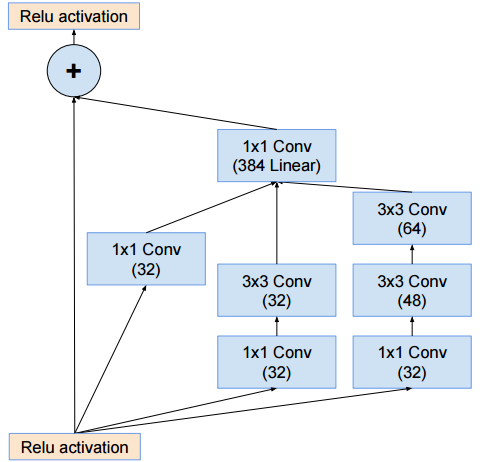

In [ ]:
class Inception_Resnet_A(nn.Module):
    def __init__(self, in_channels):
        super().__init__()

        self.branch1x1 = BasicConv2d(in_channels, 32, 1, stride=1, padding=0)

        self.branch3x3 = nn.Sequential(
            BasicConv2d(in_channels, 32, 1, stride=1, padding=0),
            BasicConv2d(32, 32, 3, stride=1, padding=1)
        )

        self.branch3x3stack = nn.Sequential(
            BasicConv2d(in_channels, 32, 1, stride=1, padding=0),
            BasicConv2d(32, 48, 3, stride=1, padding=1),
            BasicConv2d(48, 64, 3, stride=1, padding=1)
        )
        
        self.reduction1x1 = nn.Conv2d(128, 384, 1, stride=1, padding=0)
        self.shortcut = nn.Conv2d(in_channels, 384, 1, stride=1, padding=0)
        self.bn = nn.BatchNorm2d(384)
        self.relu = nn.ReLU()

    def forward(self, x):
        x_shortcut = self.shortcut(x)
        x = torch.cat((self.branch1x1(x), self.branch3x3(x), self.branch3x3stack(x)), dim=1)
        x = self.reduction1x1(x)
        x = self.bn(x_shortcut + x)
        x = self.relu(x)
        return x

Inception-resnetA가 잘 구축됐는지 확인한다.

In [ ]:
# check Inception_Resnet_A
model = Inception_Resnet_A(output_Stem.size()[1]).to(device)
output_resA = model(output_Stem)
print('Input size:', output_Stem.size())
print('output size:', output_resA.size())

ReductionA를 정의한다.
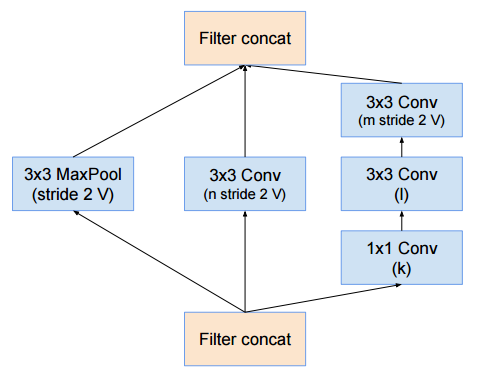

In [ ]:
class ReductionA(nn.Module):
    def __init__(self, in_channels, k, l, m, n):
        super().__init__()

        self.branchpool = nn.MaxPool2d(3, 2)
        self.branch3x3 = BasicConv2d(in_channels, n, 3, stride=2, padding=0)
        self.branch3x3stack = nn.Sequential(
            BasicConv2d(in_channels, k, 1, stride=1, padding=0),
            BasicConv2d(k, l, 3, stride=1, padding=1),
            BasicConv2d(l, m, 3, stride=2, padding=0)
        )

        self.output_channels = in_channels + n + m

    def forward(self, x):
        x = torch.cat((self.branchpool(x), self.branch3x3(x), self.branch3x3stack(x)), dim=1)
        return x

In [ ]:
# check ReductionA
print('input size:', output_resA.size())
model = ReductionA(output_resA.size()[1], 256, 256, 384, 384).to(device)
output_rA = model(output_resA)
print('output size:', output_rA.size())

Inception-ResnetB 모듈을 정의한다.
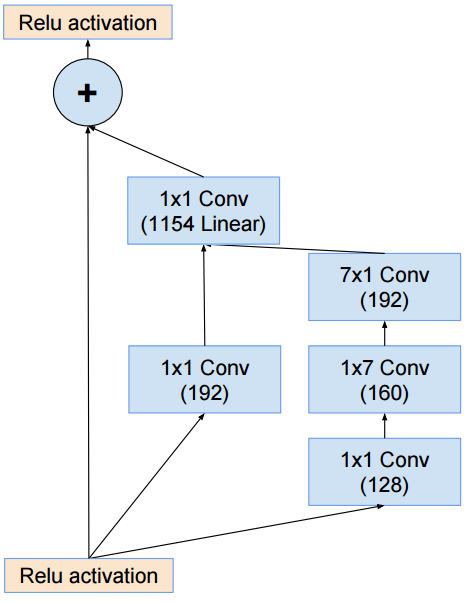

In [8]:
class Inception_Resnet_B(nn.Module):
    def __init__(self, in_channels):
        super().__init__()

        self.branch1x1 = BasicConv2d(in_channels, 192, 1, stride=1, padding=0)
        self.branch7x7 = nn.Sequential(
            BasicConv2d(in_channels, 128, 1, stride=1, padding=0),
            BasicConv2d(128, 160, (1,7), stride=1, padding=(0,3)),
            BasicConv2d(160, 192, (7,1), stride=1, padding=(3,0))
        )

        self.reduction1x1 = nn.Conv2d(384, 1152, 1, stride=1, padding=0)
        self.shortcut = nn.Conv2d(in_channels, 1152, 1, stride=1, padding=0)
        self.bn = nn.BatchNorm2d(1152)
        self.relu = nn.ReLU()

    def forward(self, x):
        x_shortcut = self.shortcut(x)
        x = torch.cat((self.branch1x1(x), self.branch7x7(x)), dim=1)
        x = self.reduction1x1(x) * 0.1
        x = self.bn(x + x_shortcut)
        x = self.relu(x)
        return x

In [ ]:
# check Inception_Resnet_B
model = Inception_Resnet_B(output_rA.size()[1]).to(device)
output_resB = model(output_rA)
print('Input size:', output_rA.size())
print('output size:', output_resB.size())

ReductionB를 정의한다.
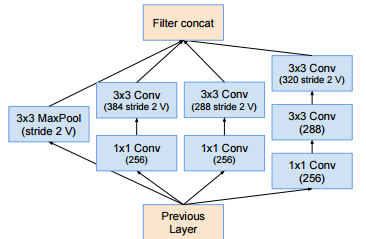

In [ ]:
class ReductionB(nn.Module):
    def __init__(self, in_channels):
        super().__init__()

        self.branchpool = nn.MaxPool2d(3, 2)
        self.branch3x3a = nn.Sequential(
            BasicConv2d(in_channels, 256, 1, stride=1, padding=0),
            BasicConv2d(256, 384, 3, stride=2, padding=0)
        )
        self.branch3x3b = nn.Sequential(
            BasicConv2d(in_channels, 256, 1, stride=1, padding=0),
            BasicConv2d(256, 288, 3, stride=2, padding=0)
        )
        self.branch3x3stack = nn.Sequential(
            BasicConv2d(in_channels, 256, 1, stride=1, padding=0),
            BasicConv2d(256, 288, 3, stride=1, padding=1),
            BasicConv2d(288, 320, 3, stride=2, padding=0)
        )

    def forward(self, x):
        x = torch.cat((self.branchpool(x), self.branch3x3a(x), self.branch3x3b(x), self.branch3x3stack(x)), dim=1)
        return x

In [ ]:
# check ReductionB
model = ReductionB(output_resB.size()[1]).to(device)
output_rB = model(output_resB)
print('Input size:', output_resB.size())
print('output size:', output_rB.size())

Inception ResNetC 모듈을 정의한다.
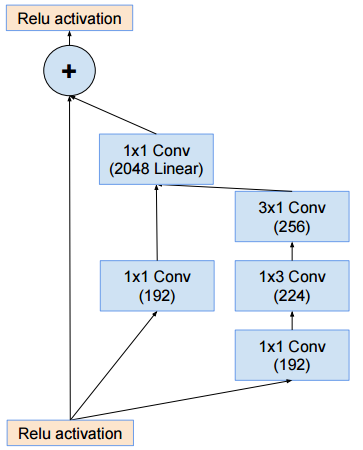

In [ ]:
class Inception_Resnet_C(nn.Module):
    def __init__(self, in_channels):
        super().__init__()

        self.branch1x1 = BasicConv2d(in_channels, 192, 1, stride=1, padding=0)
        self.branch3x3 = nn.Sequential(
            BasicConv2d(in_channels, 192, 1, stride=1, padding=0),
            BasicConv2d(192, 224, (1,3), stride=1, padding=(0,1)),
            BasicConv2d(224, 256, (3,1), stride=1, padding=(1,0))
        )

        self.reduction1x1 = nn.Conv2d(448, 2144, 1, stride=1, padding=0)
        self.shortcut = nn.Conv2d(in_channels, 2144, 1, stride=1, padding=0) # 2144
        self.bn = nn.BatchNorm2d(2144)
        self.relu = nn.ReLU()

    def forward(self, x):
        x_shortcut = self.shortcut(x)
        x = torch.cat((self.branch1x1(x), self.branch3x3(x)), dim=1)
        x = self.reduction1x1(x) * 0.1
        x = self.bn(x_shortcut + x)
        x = self.relu(x)
        return x

In [ ]:
# check Inception_Resnet_C
model = Inception_Resnet_C(output_rB.size()[1]).to(device)
output_resC = model(output_rB)
print('Input size:', output_rB.size())
print('output size:', output_resC.size())

전체 구조를 정의한다.

In [ ]:
class InceptionResNetV2(nn.Module):
    def __init__(self, A, B, C, k=256, l=256, m=384, n=384, num_classes=10, init_weights=True):
        super().__init__()
        blocks = []
        blocks.append(Stem())
        for i in range(A):
            blocks.append(Inception_Resnet_A(384))
        blocks.append(ReductionA(384, k, l, m, n))
        for i in range(B):
            blocks.append(Inception_Resnet_B(1152))
        blocks.append(ReductionB(1152))
        for i in range(C):
            blocks.append(Inception_Resnet_C(2144))

        self.features = nn.Sequential(*blocks)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        # drop out
        self.dropout = nn.Dropout2d(0.2)
        self.linear = nn.Linear(2144, num_classes)

        # weights inittialization
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.linear(x)
        return x

    # define weight initialization function
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [ ]:
# create InceptionResNetV2
model = InceptionResNetV2(10, 20, 10).to(device)
summary(model, (3, 299, 299), device=device.type)

## 학습

In [ ]:
# define loss function and optimizer
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.Adam(model.parameters(), lr=0.001)

from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=10)

In [ ]:
# function to get current learning rate
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

# function to calculate metric per mini-batch
def metric_batch(output, target):
    pred = output.argmax(1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

# function to calculate loss per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss_b = loss_func(output, target)
    metric_b = metric_batch(output, target)

    if opt is not None:
        opt.zero_grad()
        loss_b.backward()
        opt.step()

    return loss_b.item(), metric_b

# function to calculate loss per epoch
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b

        if metric_b is not None:
            running_metric += metric_b

        if sanity_check is True:
            break

    loss = running_loss / len_data
    metric = running_metric / len_data

    return loss, metric

# function to start training
def train_val(model, params):
    num_epochs=params['num_epochs']
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]

    loss_history = {'train': [], 'val': []}
    metric_history = {'train': [], 'val': []}

    best_loss = float('inf')

    start_time = time.time()

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))

        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            print('Get best val_loss!')

        lr_scheduler.step(val_loss)

        print('train loss: %.6f, val loss: %.6f, accuracy: %.2f, time: %.4f min' %(train_loss, val_loss, 100*val_metric, (time.time()-start_time)/60))
        print('-'*10)

    return model, loss_history, metric_history

In [ ]:
# definc the training parameters
params_train = {
    'num_epochs':5,
    'optimizer':opt,
    'loss_func':loss_func,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'./models/weights.pt',
}

# create the directory that stores weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

In [ ]:
model, loss_hist, metric_hist = train_val(model, params_train)

loss, accuracy progress 확인

In [ ]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()